In [1]:
# Fuentes: 
# https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html
# https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
# Vea el notebook random_forest_scikit_learn
# Los comentarios de dicho notebook aplican en este ejercicio
# Datos: https://drive.google.com/open?id=0B-dmEvN59Z2ZcnZmY2d5ekRESlk

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

belisario = pd.read_csv("regressionData.csv")
belisario['PL2'] = np.where(belisario['PARTICULAS.microg.m3.']>=15, 'UH', 'H')
print(belisario.head())
print('\nSummary:\n', belisario.describe())
print('\nSummary PL2:\n', belisario.PL2.describe())

   PRECIPITATION.mm.         X         Y  PARTICULAS.microg.m3. PL2
0                9.3 -1.097987  1.562858                  24.84  UH
1                0.1 -2.602452 -0.948759                  17.81  UH
2                0.0 -3.238200  0.107988                  15.86  UH
3                0.0  1.807980  1.812404                  26.33  UH
4                0.0  1.482232  1.473462                  23.46  UH

Summary:
        PRECIPITATION.mm.            X            Y  PARTICULAS.microg.m3.
count        1587.000000  1587.000000  1587.000000            1587.000000
mean            3.111483    -0.508142     0.981576              18.421028
std             6.195972     1.397499     0.879884               5.458568
min             0.000000    -6.233477    -4.155201               5.740000
25%             0.000000    -1.372969     0.568808              14.865000
50%             0.100000    -0.609217     1.164141              18.360000
75%             3.111483     0.611006     1.554612             

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = belisario[belisario.columns[0:3]]
y = belisario[belisario.columns[4]]

# random_state: semilla del generador de números aleatorios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()

# Ajuste solo los datos de entrenamiento
scaler.fit(X_train)

# Aplicaremos la transformación a los datos
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

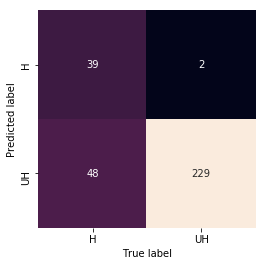

             precision    recall  f1-score   support

          H       0.95      0.45      0.61        87
         UH       0.83      0.99      0.90       231

avg / total       0.86      0.84      0.82       318



In [4]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = mlp.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, predictions),
                  columns=y_test.unique(),
                  index=y_test.unique())

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

print(classification_report(y_test,predictions))

In [5]:
# Vamos a realizar una regresión

from sklearn.neural_network import MLPRegressor

X = belisario[belisario.columns[0:3]]
y = belisario[belisario.columns[3]]

# random_state: semilla del generador de números aleatorios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(30,), max_iter=1000, activation='logistic')
mlp.fit(X_train, y_train)

/home/salva/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

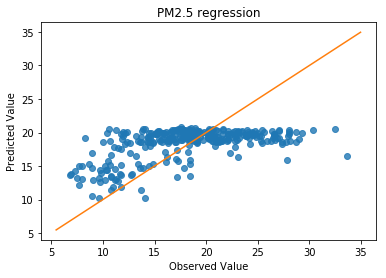

In [6]:
def abline():
    gca = plt.gca()
    gca.plot((gca.get_xlim()),gca.get_xlim())

predicted = mlp.predict(X_test)

ax = sns.regplot(y_test, predicted, fit_reg=False)
ax.set(xlabel='Observed Value', ylabel='Predicted Value', title="PM2.5 regression")

abline()
plt.show()

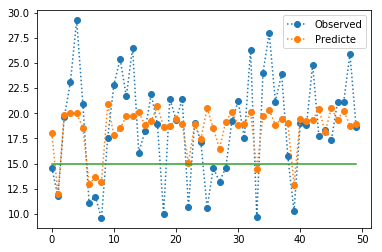

In [7]:
plt.plot(np.array(y_test)[0:50], ':o', label="Observed")
plt.plot(predicted[0:50], ':o', label="Predicte")
plt.plot(np.ones(50)*15)  # línea de referencia para las clases
plt.legend()
plt.show()

In [8]:
classified_data = pd.DataFrame()
classified_data['observed'] = np.where(y_test>=15, 'UH', 'H')
classified_data['predicted'] = np.where(predicted>=15, 'UH', 'H')
classified_data['observed_bin'] = np.where(y_test>=15, 1, 0)
classified_data['predicted_bin'] = np.where(predicted>=15, 1, 0)
print(classified_data.head())
print("\nSummary\n", classified_data[['observed', 'predicted']].describe())

  observed predicted  observed_bin  predicted_bin
0        H        UH             0              1
1        H         H             0              0
2       UH        UH             1              1
3       UH        UH             1              1
4       UH        UH             1              1

Summary
        observed predicted
count       318       318
unique        2         2
top          UH        UH
freq        231       278


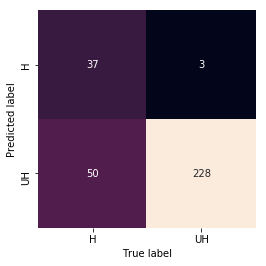

             precision    recall  f1-score   support

          0       0.93      0.43      0.58        87
          1       0.82      0.99      0.90       231

avg / total       0.85      0.83      0.81       318



In [9]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(confusion_matrix(classified_data['observed'],
                                   classified_data['predicted']),
                  columns=classified_data['observed'].unique(),
                  index=classified_data['observed'].unique())

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

print(classification_report(classified_data['observed_bin'], 
                              classified_data['predicted_bin']))

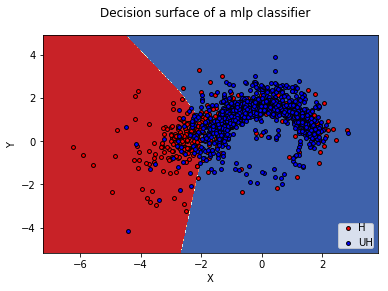

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X = belisario[belisario.columns[0:3]]
y = belisario[belisario.columns[4]]
y = np.where(y=="UH",1,0)

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

pair = [1, 2]

# We only take the two corresponding features
Xd = X.iloc[:, pair]

# Train
clf = MLPClassifier(hidden_layer_sizes=(15,)).fit(Xd,y)

x_min, x_max = Xd.iloc[:, 0].min() - 1, Xd.iloc[:, 0].max() + 1
y_min, y_max = Xd.iloc[:, 1].min() - 1, Xd.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


plt.xlabel("X")
plt.ylabel("Y")

t_names = ["H", "UH"]

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(Xd.iloc[list(idx[0]), 0], Xd.iloc[list(idx[0]), 1], 
                c=color, label=t_names[i], cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=15)

plt.suptitle("Decision surface of a mlp classifier")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()